In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import time
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
urls={'Premier League': 'https://fbref.com/en/comps/9/history/Premier-League-Seasons',
    'La Liga': 'https://fbref.com/en/comps/12/history/La-Liga-Seasons',
    'Serie A': 'https://fbref.com/en/comps/11/history/Serie-A-Seasons',
    'Bundesliga': 'https://fbref.com/en/comps/20/history/Bundesliga-Seasons',
    'Ligue 1': 'https://fbref.com/en/comps/13/history/Ligue-1-Seasons'}

#This function gets the urls for each season from the history page
def get_urls(history_url, season_number=15):
    page=requests.get(history_url)
    soup=BeautifulSoup(page.content,'html.parser')
    table=soup.find('table')
    urls=[]
    
    for row in table.find('tbody').find_all('tr'):
        first_cell=row.find('th')
        if first_cell and first_cell.find('a'):
            link=first_cell.find('a')['href']
            full_link='https://fbref.com'+link
            urls.append(full_link)
    
    return urls[:season_number]

#This list stores all the data retrieved
all_data=[]

#Starts from most recent season in order to later count down
starting_year=2025

for league, history_url in urls.items():
    print(f"\n webscraping {league}")
    
    urls=get_urls(history_url)
    year=starting_year
    
    for season_url in urls:
        try:
            tables=pd.read_html(season_url)
            league_table=tables[0]
            time.sleep(random.randint(4, 8))

            #Organise table
            league_table2=league_table[['Rk', 'Squad', 'Pts', 'MP', 'Pts/MP',
                                        'W', 'D', 'L']]
            league_table2.columns=['Position', 'Team', 'Points', 
                                    'Matches Played', 'Points per Match',
                                   'Wins', 'Draws', 'Losses']
            league_table2=league_table2.dropna()

            #Create league table and season year
            league_table2['League']=league
            league_table2['Season']=year

            #Format columns
            league_table2=league_table2[['League', 'Season', 'Position',
                                         'Team', 'Points', 'Matches Played', 
                                         'Points per Match', 'Wins', 'Draws', 'Losses']]

            all_data.append(league_table2)

            print(f"Scraped {league} {year}")
            #Count down the seasons
            year-=1 
        
        except Exception as e:
            print(f"Error in {league} {year}: {e}")


#Put into one dataframe
combined_df=pd.concat(all_data, ignore_index=True)

#Create CSV
combined_df.to_csv('data.csv', index=False)

print("\n Data saved")


 webscraping Premier League
Scraped Premier League 2025
Scraped Premier League 2024
Scraped Premier League 2023
Scraped Premier League 2022
Scraped Premier League 2021
Scraped Premier League 2020
Scraped Premier League 2019
Scraped Premier League 2018
Scraped Premier League 2017
Scraped Premier League 2016
Scraped Premier League 2015
Scraped Premier League 2014
Scraped Premier League 2013
Scraped Premier League 2012
Scraped Premier League 2011

 webscraping La Liga
Scraped La Liga 2025
Scraped La Liga 2024
Scraped La Liga 2023
Scraped La Liga 2022
Scraped La Liga 2021
Scraped La Liga 2020
Scraped La Liga 2019
Scraped La Liga 2018
Scraped La Liga 2017
Scraped La Liga 2016
Scraped La Liga 2015
Scraped La Liga 2014
Scraped La Liga 2013
Scraped La Liga 2012
Scraped La Liga 2011

 webscraping Serie A
Scraped Serie A 2025
Scraped Serie A 2024
Scraped Serie A 2023
Scraped Serie A 2022
Scraped Serie A 2021
Scraped Serie A 2020
Scraped Serie A 2019
Scraped Serie A 2018
Scraped Serie A 2017
Scr

In [225]:
df=pd.read_csv('data.csv')
df.head(1500)

,League,Season,Position,Team,Points,Matches Played,Points per Match,Wins,Draws,Losses
0,Premier League,2025,1,Liverpool,79,33,2.39,24,7,2
1,Premier League,2025,2,Arsenal,67,34,1.97,18,13,3
2,Premier League,2025,3,Newcastle Utd,62,34,1.82,19,5,10
3,Premier League,2025,4,Manchester City,61,34,1.79,18,7,9
4,Premier League,2025,5,Chelsea,60,34,1.76,17,9,8
...,...,...,...,...,...,...,...,...,...,...
1461,Ligue 1,2011,16,Brest,46,38,1.21,11,13,14
1462,Ligue 1,2011,17,Nice,46,38,1.21,11,13,14
1463,Ligue 1,2011,18,Monaco,44,38,1.16,9,17,12
1464,Ligue 1,2011,19,Lens,35,38,0.92,7,14,17


In [226]:
#Check if any data cleaning is required
print(df.isnull().sum())
print(df.duplicated().sum())
#Check types
print(df.dtypes)

League              0
Season              0
Position            0
Team                0
Points              0
Matches Played      0
Points per Match    0
Wins                0
Draws               0
Losses              0
dtype: int64
0
League               object
Season                int64
Position              int64
Team                 object
Points                int64
Matches Played        int64
Points per Match    float64
Wins                  int64
Draws                 int64
Losses                int64
dtype: object


In [282]:
#Calculate (38/matches played) so the winning margin can be standardised
comp_df=df.groupby('League')['Matches Played'].mean().reset_index()
comp_df['Match Ratio']=38/comp_df['Matches Played']

#Calculate average winning margin for each team over the last 15 years
margins=[]
grouped=df.groupby(['League', 'Season'])
for (league, season), group in grouped:
        margin=group.iloc[0]['Points']-group.iloc[1]['Points']
        margins.append({'League': league, 'Winning Margin': margin})

margins_df=pd.DataFrame(margins)
avg_margin=margins_df.groupby('League')['Winning Margin'].mean().reset_index()

#Normalise winning margin
min_margin=avg_margin['Winning Margin'].min()
max_margin=avg_margin['Winning Margin'].max()

avg_margin['Normalised Winning Margin']=(avg_margin['Winning Margin']
                                -min_margin)/(max_margin-min_margin)

#Calculate average amount of title contenders 
contenders=[]
grouped=df.groupby(['League', 'Season'])
for (league, season), group in grouped:
    group_sorted=group.sort_values('Position')
    top_points=group_sorted.iloc[0]['Points']
    contender_count=(group_sorted['Points']>=top_points-3).sum()
    contenders.append({'League': league, 'Season': season, 'Contenders':
                       contender_count})

contenders_df = pd.DataFrame(contenders)
avg_contenders = contenders_df.groupby('League')['Contenders'].mean().reset_index()

#Normalise avg_contenders
min_contend=avg_contenders['Contenders'].min()
max_contend=avg_contenders['Contenders'].max()

#Taken away from 1 such that for all variables a higher score is better
avg_contenders['Normalised average contenders']=(1-(avg_contenders['Contenders']
                                -min_contend)/(max_contend-min_contend))



#Calculate proportion of titles won by most dominant team in each league over the last 
#15 years
titles=df[df['Position']==1]

title_counts=titles.groupby(['League', 'Team']).size().reset_index(name='Titles')
dominant_team=title_counts.sort_values(['League', 'Titles'],
                    ascending=[True, False]).drop_duplicates('League')

dominant_team['Dominance Ratio']=dominant_team['Titles']/15
dominance_ratio = dominant_team[['League', 'Dominance Ratio']].copy()

#Normalise winning margin
min_dominance=dominance_ratio['Dominance Ratio'].min()
max_dominance=dominance_ratio['Dominance Ratio'].max()

dominance_ratio['Normalised Dominance Ratio']=(dominance_ratio['Dominance Ratio']
                                -min_dominance)/(max_dominance-min_dominance)

#Calculate score for title competitiveness
merged = avg_contenders[['League', 'Normalised average contenders']] \
    .merge(dominance_ratio[['League', 'Normalised Dominance Ratio']], on='League') \
    .merge(avg_margin[['League', 'Normalised Winning Margin']], on='League') \
    .merge(games_ratio[['League', 'Match Ratio']], on='League')

competitive_title=(0.25*avg_contenders['Normalised average contenders'])+(0.5*dominance_ratio['Normalised Dominance Ratio'])+(0.25*avg_margin['Normalised Winning Margin'])*games_ratio['Match Ratio']
competitive_title

0     1.031188
1          NaN
2          NaN
3          NaN
4     0.290076
9          NaN
13         NaN
16         NaN
dtype: float64

In [274]:
# Create an initial DataFrame 'comp_df' to store all needed values
comp_df = df.groupby('League')['Matches Played'].mean().reset_index()
comp_df['Match Ratio'] = 38 / comp_df['Matches Played']

# Add the 'Winning Margin' directly to comp_df by calculating the margin
# Group by 'League' and 'Season' for the margin calculation
grouped = df.groupby(['League', 'Season'])
margins = []

# Calculate the margin and directly append it to comp_df
for (league, season), group in grouped:
    margin = group.iloc[0]['Points'] - group.iloc[1]['Points']
    margins.append({'League': league, 'Winning Margin': margin})

# Now directly merge 'Winning Margin' into comp_df
comp_df = comp_df.merge(pd.DataFrame(margins)[['League', 'Winning Margin']], on='League', how='left')

# Normalize 'Winning Margin' directly in comp_df
min_margin = comp_df['Winning Margin'].min()
max_margin = comp_df['Winning Margin'].max()
comp_df['Normalised Winning Margin'] = (comp_df['Winning Margin'] - min_margin) / (max_margin - min_margin)

# Now for the average amount of title contenders:
contenders = []
grouped = df.groupby(['League', 'Season'])
for (league, season), group in grouped:
    group_sorted = group.sort_values('Position')
    top_points = group_sorted.iloc[0]['Points']
    contender_count = (group_sorted['Points'] >= top_points - 3).sum()
    contenders.append({'League': league, 'Season': season, 'Contenders': contender_count})

# Merge the 'Contenders' directly into comp_df
comp_df = comp_df.merge(pd.DataFrame(contenders)[['League', 'Contenders']], on='League', how='left')

# Normalize 'Contenders' directly in comp_df
min_contend = comp_df['Contenders'].min()
max_contend = comp_df['Contenders'].max()
comp_df['Normalised average contenders'] = (1 - (comp_df['Contenders'] - min_contend) / (max_contend - min_contend))

# Now, calculate the Dominance Ratio directly in comp_df
titles = df[df['Position'] == 1]
title_counts = titles.groupby(['League', 'Team']).size().reset_index(name='Titles')

# Get the most dominant team per league
dominant_team = title_counts.sort_values(['League', 'Titles'], ascending=[True, False]).drop_duplicates('League')
dominant_team['Dominance Ratio'] = dominant_team['Titles'] / 15

# Merge the 'Dominance Ratio' directly into comp_df
comp_df = comp_df.merge(dominant_team[['League', 'Dominance Ratio']], on='League', how='left')

# Normalize 'Dominance Ratio' directly in comp_df
min_dominance = comp_df['Dominance Ratio'].min()
max_dominance = comp_df['Dominance Ratio'].max()
comp_df['Normalised Dominance Ratio'] = (comp_df['Dominance Ratio'] - min_dominance) / (max_dominance - min_dominance)
""""
# Calculate the final competitiveness score
comp_df['Competitive Title Score'] = (0.25 * comp_df['Normalised average contenders']) + \
                                      (0.5 * comp_df['Normalised Dominance Ratio']) + \
                                      (0.25 * comp_df['Normalised Winning Margin']) * comp_df['Match Ratio']
comp_df"""

,League,Matches Played,Match Ratio,Winning Margin,Normalised Winning Margin,Contenders,Normalised average contenders,Dominance Ratio,Normalised Dominance Ratio,Competitive Title Score
0,Bundesliga,33.785185,1.124753,7,0.225806,1,1.0,0.8,1.00,0.813494
1,Bundesliga,33.785185,1.124753,7,0.225806,1,1.0,0.8,1.00,0.813494
2,Bundesliga,33.785185,1.124753,7,0.225806,1,1.0,0.8,1.00,0.813494
3,Bundesliga,33.785185,1.124753,7,0.225806,1,1.0,0.8,1.00,0.813494
4,Bundesliga,33.785185,1.124753,7,0.225806,1,1.0,0.8,1.00,0.813494
...,...,...,...,...,...,...,...,...,...,...
1120,Serie A,37.666667,1.008850,0,0.000000,1,1.0,0.6,0.25,0.375000
1121,Serie A,37.666667,1.008850,0,0.000000,2,0.5,0.6,0.25,0.250000
1122,Serie A,37.666667,1.008850,0,0.000000,1,1.0,0.6,0.25,0.375000
1123,Serie A,37.666667,1.008850,0,0.000000,1,1.0,0.6,0.25,0.375000


In [270]:
#Calculate (38/matches played) so the winning margin can be standardised
comp_df=df.groupby('League')['Matches Played'].mean().reset_index()
comp_df['Match Ratio']=38/comp_df['Matches Played']

#Calculate average winning margin for each team over the last 15 years
margins=[]
grouped=df.groupby(['League', 'Season'])
for (league, season), group in grouped:
        margin=group.iloc[0]['Points']-group.iloc[1]['Points']
        margins.append({'League': league, 'Winning Margin': margin})

comp_df=comp_df.merge(pd.DataFrame(margins)[['League',
                                             'Winning Margin']],
                                              on='League', how='left')

#Normalise winning margin
min_margin=avg_margin['Winning Margin'].min()
max_margin=avg_margin['Winning Margin'].max()

comp_df['Normalised Winning Margin']=(avg_margin['Winning Margin']
                                -min_margin)/(max_margin-min_margin)

#Calculate average amount of title contenders 
contenders = []
grouped=df.groupby(['League', 'Season'])
for (league, season), group in grouped:
    group_sorted=group.sort_values('Position')
    top_points=group_sorted.iloc[0]['Points']
    contender_count=(group_sorted['Points']>=top_points-3).sum()
    contenders.append({'League': league, 'Season': season, 'Contenders':
                       contender_count})

contenders_df = pd.DataFrame(contenders)
avg_contenders = contenders_df.groupby('League')['Contenders'].mean().reset_index()

#Normalise avg_contenders
min_contend=avg_contenders['Contenders'].min()
max_contend=avg_contenders['Contenders'].max()

#Taken away from 1 such that for all variables a higher score is better
avg_contenders['Normalised average contenders']=(1 - (avg_contenders['Contenders']
                                -min_contend)/(max_contend-min_contend))



#Calculate proportion of titles won by most dominant team in each league over the last 
#15 years
titles=df[df['Position']==1]

title_counts=titles.groupby(['League', 'Team']).size().reset_index(name='Titles')
dominant_team=title_counts.sort_values(['League', 'Titles'],
                    ascending=[True, False]).drop_duplicates('League')

dominant_team['Dominance Ratio']=dominant_team['Titles']/15
dominance_ratio = dominant_team[['League', 'Dominance Ratio']].copy()

#Normalise winning margin
min_dominance=dominance_ratio['Dominance Ratio'].min()
max_dominance=dominance_ratio['Dominance Ratio'].max()

dominance_ratio['Normalised Dominance Ratio']=(dominance_ratio['Dominance Ratio']
                                -min_dominance)/(max_dominance-min_dominance)

#Calculate score for title competitiveness
# Step 1: Merge everything into one DataFrame
merged = avg_contenders[['League', 'Normalised average contenders']] \
    .merge(dominance_ratio[['League', 'Normalised Dominance Ratio']], on='League') \
    .merge(avg_margin[['League', 'Normalised Winning Margin']], on='League') \
    .merge(games_ratio[['League', 'Match Ratio']], on='League')

KeyError: "['Normalised Winning Margin'] not in index"

In [272]:
margins

[{'League': 'Bundesliga', 'Winning Margin': 7},
 {'League': 'Bundesliga', 'Winning Margin': 8},
 {'League': 'Bundesliga', 'Winning Margin': 25},
 {'League': 'Bundesliga', 'Winning Margin': 19},
 {'League': 'Bundesliga', 'Winning Margin': 10},
 {'League': 'Bundesliga', 'Winning Margin': 10},
 {'League': 'Bundesliga', 'Winning Margin': 15},
 {'League': 'Bundesliga', 'Winning Margin': 21},
 {'League': 'Bundesliga', 'Winning Margin': 2},
 {'League': 'Bundesliga', 'Winning Margin': 13},
 {'League': 'Bundesliga', 'Winning Margin': 13},
 {'League': 'Bundesliga', 'Winning Margin': 8},
 {'League': 'Bundesliga', 'Winning Margin': 0},
 {'League': 'Bundesliga', 'Winning Margin': 17},
 {'League': 'Bundesliga', 'Winning Margin': 8},
 {'League': 'La Liga', 'Winning Margin': 4},
 {'League': 'La Liga', 'Winning Margin': 9},
 {'League': 'La Liga', 'Winning Margin': 15},
 {'League': 'La Liga', 'Winning Margin': 3},
 {'League': 'La Liga', 'Winning Margin': 2},
 {'League': 'La Liga', 'Winning Margin': 1},


In [5]:
#Define function for the winning margin in each league and season
def calc_win_margin(df):
    win_margins=[]
    for (league, season), group in df.groupby(['League', 'Season']):
        #get top two highest scoring points
        top_two=group.head(2)
        
        #calculate winning margin
        margin=top_two.iloc[0]['Points']-top_two.iloc[1]['Points']
        
        #append results to list
        win_margins.append( {'League': league,
            'Season': season,
            'Winning Margin': margin})
    
    #add results to data frame
    margin_df=pd.DataFrame(win_margins)
    return margin_df

win_margins_df=calc_win_margin(df)
win_margins_df.head()

,League,Season,Winning Margin
0,Bundesliga,2011,7
1,Bundesliga,2012,8
2,Bundesliga,2013,25
3,Bundesliga,2014,19
4,Bundesliga,2015,10


In [176]:
#Get Mean and SD ready for calculating CV
cv_df=df.groupby(['League', 'Season']).agg(
    Mean_Points=('Points', 'mean'),
    Std_Points=('Points', 'std')).reset_index()

#Calculate CV
cv_df['CV']=cv_df['Std_Points']/cv_df['Mean_Points']

print(cv_df)


        League  Season  Mean_Points  Std_Points        CV
0   Bundesliga    2011    47.500000   12.552244  0.264258
1   Bundesliga    2012    46.611111   15.154649  0.325130
2   Bundesliga    2013    46.666667   16.036723  0.343644
3   Bundesliga    2014    47.444444   17.365355  0.366015
4   Bundesliga    2015    46.444444   13.587287  0.292549
..         ...     ...          ...         ...       ...
70     Serie A    2021    52.200000   20.628544  0.395183
71     Serie A    2022    52.100000   18.461624  0.354350
72     Serie A    2023    51.500000   17.992689  0.349373
73     Serie A    2024    51.400000   18.700971  0.363832
74     Serie A    2025    44.650000   16.828156  0.376890

[75 rows x 5 columns]


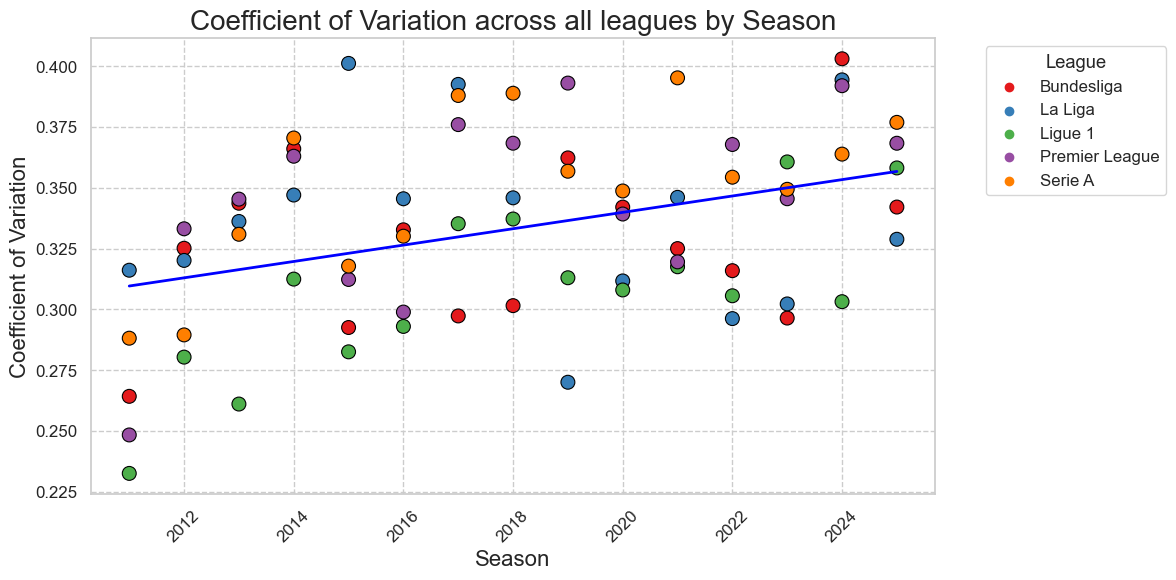

In [204]:
#Plot CV
plt.figure(figsize=(12, 6))

#Line of best fit, using robust to minimise impact of outliers
sns.regplot(data=cv_df, x='Season', y='CV',
            line_kws={'color': 'blue', 'linewidth': 2}, robust=True, ci=False)

#Add scatterplot showing CV for each league and season
sns.scatterplot(data=cv_df, x='Season', y='CV',
                hue='League', palette='Set1', s=100, edgecolor='black')

#Label
plt.title('Coefficient of Variation across all leagues by Season', fontsize=20)
plt.xlabel('Season', fontsize=16)
plt.ylabel('Coefficient of Variation', fontsize=16)
plt.xticks(rotation=45)
plt.legend(title='League', bbox_to_anchor=(1.05, 1), loc='upper left')

#For neatness
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()


In [206]:
#Get total points per league and season
df['Total Points']=df.groupby(['League', 'Season'])['Points'].transform('sum')

#Calculate HHI
#Create new columns necessary for calculation
df['Points Share']=df['Points']/df['Total Points']
df['Points Share Squared']=df['Points Share']**2

#Sum points
hhi_df=df.groupby(['League', 'Season'])['Points Share Squared'].sum().reset_index()
hhi_df.rename(columns={'Points Share Squared': 'HHI'}, inplace=True)

#Normalise HHI for number of teams in a league
#Get Number of teams per league and season
team_count=df.groupby(['League', 'Season'])['Team'].nunique().reset_index()
team_count.rename(columns={'Team': 'Number of Teams'}, inplace=True)

#Merge HHI with team count
hhi_df = hhi_df.merge(team_count, on=['League', 'Season'])

#Get normalised HHI
hhi_df['HHI Normalised']=(hhi_df['HHI']-1/
                          hhi_df['Number of Teams'])/(1-1/hhi_df['Number of Teams'])
hhi_df.head()

,League,Season,HHI,Number of Teams,HHI Normalised
0,Bundesliga,2011,0.059220,18,0.003880
1,Bundesliga,2012,0.061102,18,0.005873
2,Bundesliga,2013,0.061752,18,0.006561
3,Bundesliga,2014,0.062585,18,0.007443
4,Bundesliga,2015,0.060046,18,0.004755


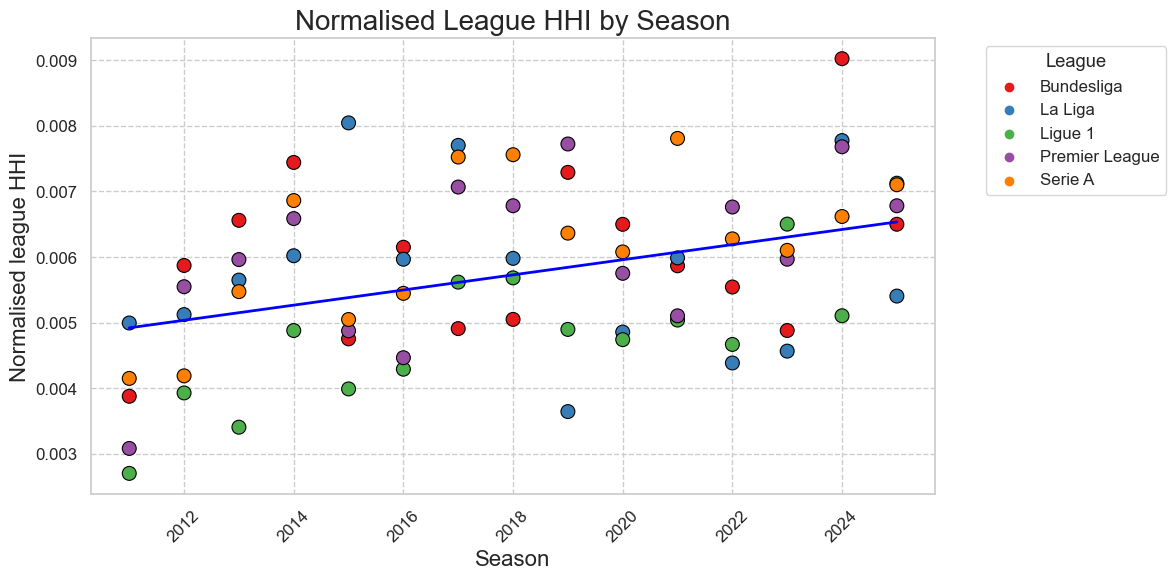

In [207]:
#Plot HHI
plt.figure(figsize=(12, 6))

#Plot line of best fit, using robust to reduce effect of outliers
sns.regplot(data=hhi_df, x='Season', y='HHI Normalised',
            line_kws={'color': 'blue', 'linewidth': 2},
            robust=True, ci=False)

#Add scatter plot
sns.scatterplot(data=hhi_df, x='Season', y='HHI Normalised',
                hue='League', palette='Set1', s=100, edgecolor='black')

#Label
plt.title('Normalised League HHI by Season'
          , fontsize=20)
plt.xlabel('Season', fontsize=16)
plt.ylabel('Normalised league HHI', fontsize=16)
plt.xticks(rotation=45)
plt.legend(title='League', bbox_to_anchor=(1.05, 1))

#For neatness
plt.grid(True, linestyle='--')
plt.tight_layout()

plt.show()


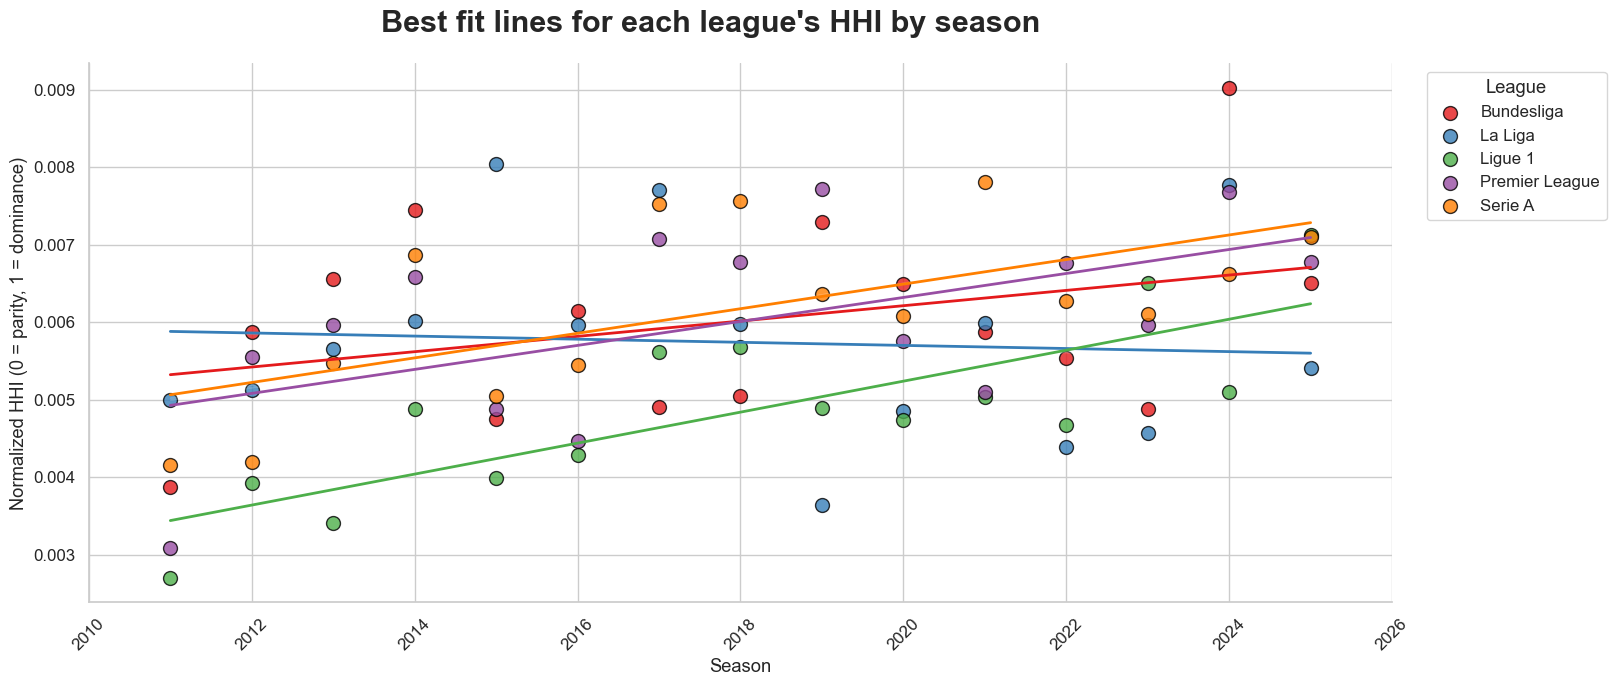

In [216]:
#Plot line of best fit for each league's HHI
#lm plot to allow for hue
g=sns.lmplot(data=hhi_df, x='Season', y='HHI Normalised', hue='League', height=7,
    aspect=1.8, palette='Set1', scatter_kws={'s': 100, 'edgecolor': 'black'},
    line_kws={'linewidth': 2}, ci=False)

#Label
g.fig.suptitle("Best fit lines for each league's HHI by season",
               fontsize=22, weight='bold')
g.set_axis_labels('Season', 'Normalised HHI)')
g.set_xticklabels(rotation=45)

plt.tight_layout()
g._legend.remove()
plt.legend(title='League', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()
